# 31.3 Craft a Story from a Dataset

Dataset: Environmental Impact of Food Production from Kaggle<br>
https://www.kaggle.com/datasets/selfvivek/environment-impact-of-food-production

In [5]:
# import libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# read in data
datafile = "Food_Production.csv"
data = pd.read_csv(datafile)
data.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

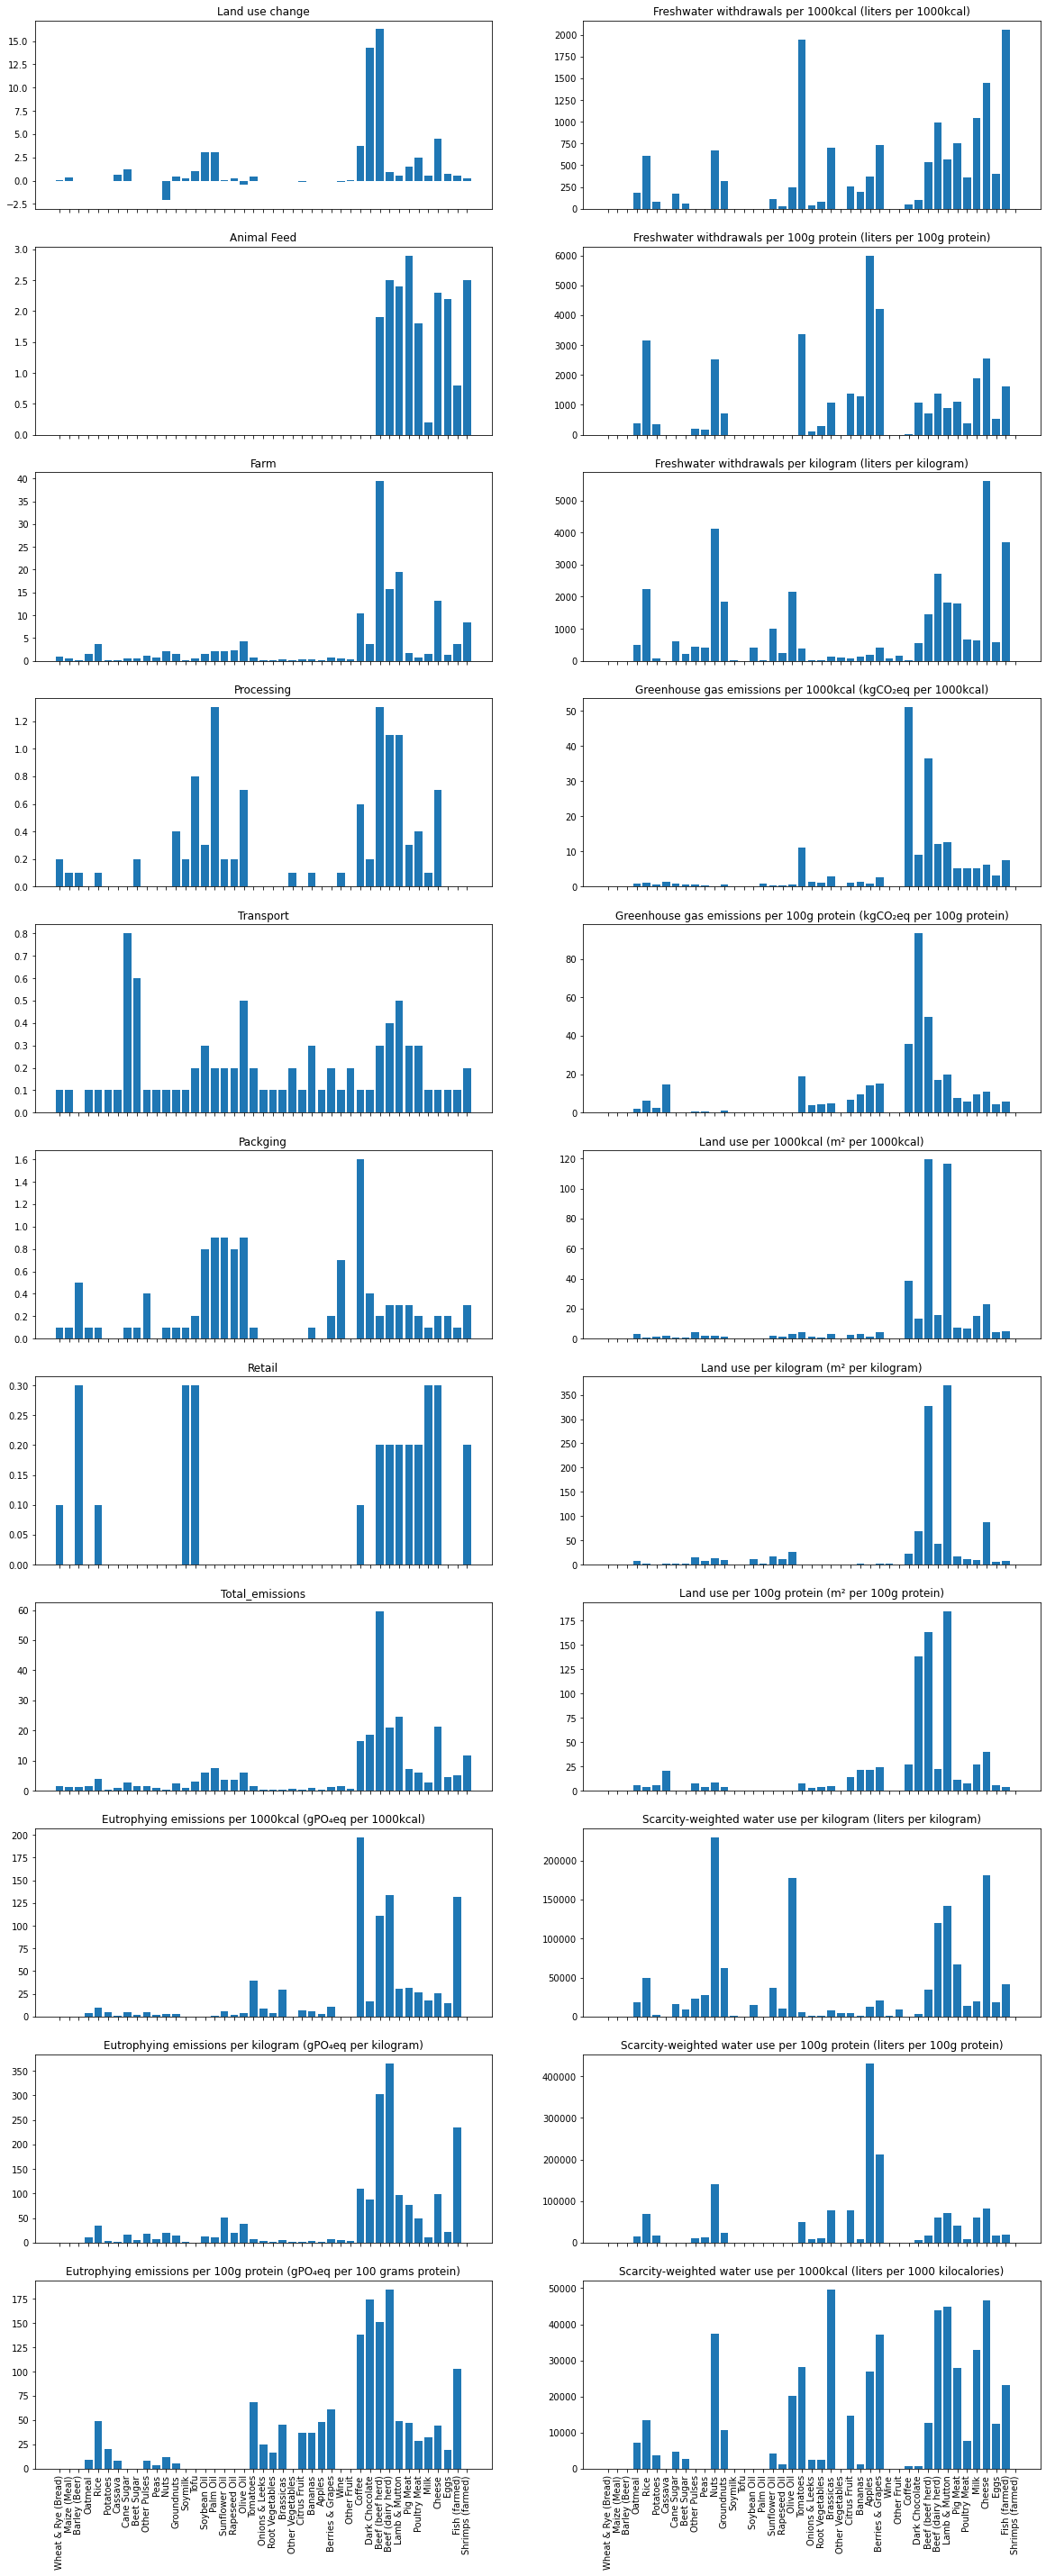

In [33]:
fig, axs = plt.subplots(11, 2, sharex = True, figsize = (20, 50))

features = data.drop('Food product', axis =1)

for idx, col in enumerate(features.columns):
    if idx <= 10: ax = axs[idx, 0]
    else: ax = axs[idx - 11, 1]
    
    ax.bar(data['Food product'], data[col])
    ax.set_title(col)
    ax.tick_params(axis = 'x', labelrotation = 90)
plt.show()

This is super interesting! It looks like there are a couple of potential stories in this dataset:<br>
1) The bars are clustered on the right side of the graph for many of the categories, with the top emissions across multiple categories coming out as:<br>
- Coffee<br>
- Dark Chocolate<br>
- Beef (beef herd)<br>
- Beef (dairy herd)<br>
2) Generally, these don't seem to fall into broader categories (with obvious exceptions like the emissions associated with animal feed are going to be associated with animals). You have lots of random standouts in each category.<br>
3) Total emissions associated with cows as beef swamp absolutely everything else.

### Let's make a pie chart to showcase proportion of total emissions that come from eating beef

Starting with #3 above here, although this should probably go towards the end of the presentation.

In [70]:
# Get the total emissions of beef, other meats, and lacto-ovo-associated categories
totemiss_beef = [data.loc[data['Food product'] == 'Beef (beef herd)', 'Total_emissions']]

other_meat_list = ['Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Fish (farmed)', 'Shrimps (farmed)']
lacto_ovo_list = ['Beef (dairy herd)', 'Milk', 'Cheese', 'Eggs']

totemiss_othermeats = []
for meat in other_meat_list:
    value = data.loc[data['Food product'] == meat, 'Total_emissions']
    totemiss_othermeats.append(value)

totemiss_lactoovo = []
for item in lacto_ovo_list:
    value = data.loc[data['Food product'] == item, 'Total_emissions']
    totemiss_lactoovo.append(value)

# make a list of the proportions
concat_animals = np.array(totemiss_beef + totemiss_othermeats + totemiss_lactoovo)
total_totemiss = data['Total_emissions'].sum()
proportions_animals = 100 * concat_animals/total_totemiss
proportions = np.append(proportions_animals, 100 - sum(proportions_animals))

# Labels
labels = ['Beef (beef herd)'] + other_meat_list + lacto_ovo_list + ['Other']

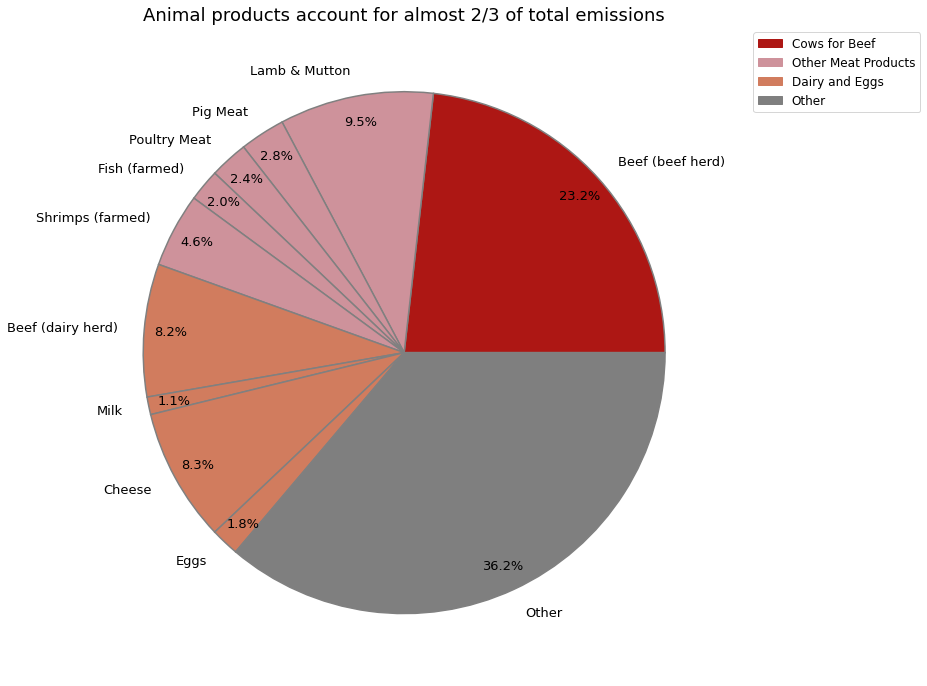

In [140]:
# colors
colors = ['#ad1714', # beef for food
          '#ce929b', '#ce929b', '#ce929b', '#ce929b', '#ce929b', # other meats
          '#d17c5e', '#d17c5e', '#d17c5e', '#d17c5e', # lacto-ovo
          '#7f7f7f'] # other

# create custom legend with proxy artists
beef_patch = mpatches.Patch(color = '#ad1714', label = 'Cows for Beef')
meat_patch = mpatches.Patch(color = '#ce929b', label = 'Other Meat Products')
dairy_patch = mpatches.Patch(color = '#d17c5e', label = 'Dairy and Eggs')
other_patch = mpatches.Patch(color = '#7f7f7f', label = 'Other')

plt.figure(figsize = (12, 12))
plt.pie(proportions, labels = labels, autopct = '%1.1f%%', pctdistance = 0.9, colors = colors,
        wedgeprops = {'linewidth': 1.5, 'edgecolor': 'gray'}, textprops = {'fontsize': 13})
plt.title("Animal products account for almost 2/3 of total emissions", fontsize = 18)
plt.legend(handles = [beef_patch, meat_patch, dairy_patch, other_patch], bbox_to_anchor = (1.3, 1), fontsize = 12)
plt.show()

In [119]:
# explain what other is if it's not already in presentation
maxdict = {}
for feat in features.columns:
    max3 = data.loc[data[feat].nlargest(3).index, ['Food product']]['Food product']
    maxdict[feat] = max3.values

maxDF = pd.DataFrame(maxdict)

In [120]:
maxDF.head()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Beef (beef herd),Pig Meat,Beef (beef herd),Palm Oil,Cane Sugar,Coffee,Barley (Beer),Beef (beef herd),Coffee,Beef (dairy herd),Beef (dairy herd),Fish (farmed),Apples,Cheese,Coffee,Dark Chocolate,Beef (beef herd),Lamb & Mutton,Lamb & Mutton,Nuts,Apples,Brassicas
1,Dark Chocolate,Beef (dairy herd),Lamb & Mutton,Beef (beef herd),Beet Sugar,Palm Oil,Soymilk,Lamb & Mutton,Beef (dairy herd),Beef (beef herd),Dark Chocolate,Tomatoes,Berries & Grapes,Nuts,Beef (beef herd),Beef (beef herd),Lamb & Mutton,Beef (beef herd),Beef (beef herd),Cheese,Berries & Grapes,Cheese
2,Cheese,Shrimps (farmed),Beef (dairy herd),Beef (dairy herd),Olive Oil,Sunflower Oil,Tofu,Cheese,Fish (farmed),Fish (farmed),Beef (beef herd),Cheese,Tomatoes,Fish (farmed),Lamb & Mutton,Coffee,Coffee,Cheese,Dark Chocolate,Olive Oil,Nuts,Lamb & Mutton


In [123]:
maxDF.stack().value_counts()

Beef (beef herd)     11
Cheese                7
Lamb & Mutton         7
Beef (dairy herd)     6
Coffee                5
Fish (farmed)         4
Dark Chocolate        4
Nuts                  3
Tomatoes              2
Apples                2
Palm Oil              2
Olive Oil             2
Berries & Grapes      2
Sunflower Oil         1
Shrimps (farmed)      1
Cane Sugar            1
Soymilk               1
Beet Sugar            1
Brassicas             1
Pig Meat              1
Barley (Beer)         1
Tofu                  1
Name: count, dtype: int64

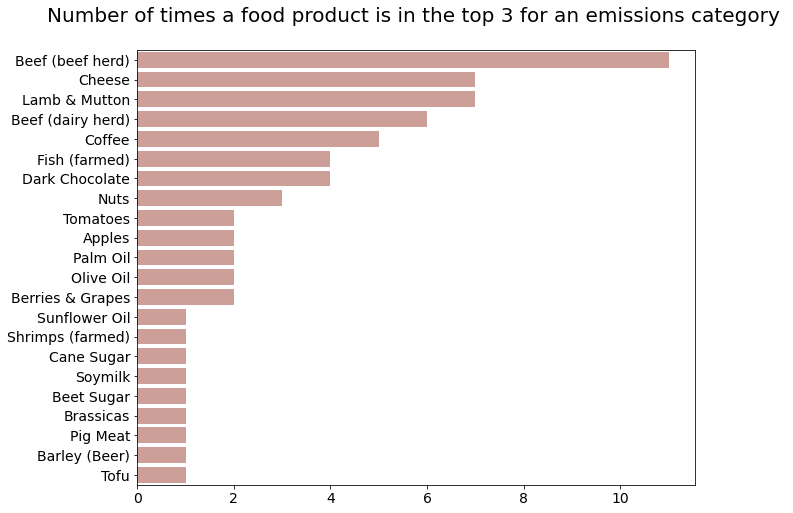

In [139]:
totals = maxDF.stack().value_counts()

plt.figure(figsize = (10, 8))
sns.barplot(y = totals.index, x = totals.values, orient = 'h', color = '#d59890')
plt.title("Number of times a food product is in the top 3 for an emissions category \n", fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 14)
plt.show()